In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy import stats
import seaborn as sns
%matplotlib inline

Text(0, 0.5, '$logistic(z)$')

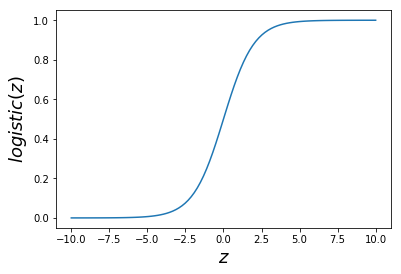

In [2]:
z = np.linspace(-10, 10, 100)
logistic = 1 / (1 + np.exp(-z))
plt.plot(z, logistic)
plt.xlabel('$z$', fontsize=18)
plt.ylabel('$logistic(z)$', fontsize=18)

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


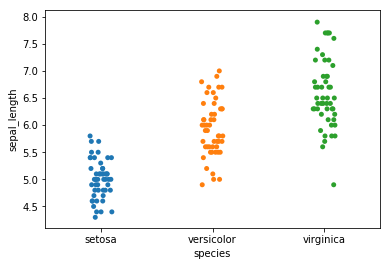

In [4]:
sns.stripplot(x='species', y='sepal_length', data=iris, jitter=True)

In [5]:
sns.pairplot(iris, hue='species', diag_kind='kde')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [24]:
df = iris[(iris['species'] == 'setosa') | (iris['species'] == 'versicolor')]
df = iris.query('species == "setosa" or species == "versicolor"')
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values

In [25]:
print(df)

    sepal_length  sepal_width  petal_length  petal_width     species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
5            5.4          3.9           1.7          0.4      setosa
6            4.6          3.4           1.4          0.3      setosa
7            5.0          3.4           1.5          0.2      setosa
8            4.4          2.9           1.4          0.2      setosa
9            4.9          3.1           1.5          0.1      setosa
10           5.4          3.7           1.5          0.2      setosa
11           4.8          3.4           1.6          0.2      setosa
12           4.8          3.0           1.4          0.1      setosa
13           4.3          3.0     

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -75.758, ||grad|| = 23.25:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -53.99, ||grad|| = 85.391:   0%|          | 10/5000 [00:00<00:01, 2502.42it/s]

logp = -41.726, ||grad|| = 3.5299e-05:   0%|          | 20/5000 [00:00<00:01, 2502.42it/s]

logp = -41.726, ||grad|| = 3.5299e-05: 100%|██████████| 23/23 [00:00<00:00, 2302.25it/s]  

Sequential sampling (1 chains in 1 job)

NUTS: [beta, alpha]

  0%|          | 0/5500 [00:00<?, ?it/s]

  1%|          | 28/5500 [00:00<00:19, 277.51it/s]

  1%|          | 57/5500 [00:00<00:19, 279.60it/s]

  1%|▏         | 82/5500 [00:00<00:20, 267.50it/s]

  2%|▏         | 123/5500 [00:00<00:18, 298.06it/s]

  3%|▎         | 151/5500 [00:00<00:18, 287.10it/s]

  3%|▎         | 176/5500 [00:00<00:19, 267.89it/s]

  4%|▎         | 201/5500 [00:00<00:21, 252.04it/s]

  4%|▍         | 225/5500 [00:00<00:23, 229.19it/s]

  5%|▍         | 253/5500 [00:00<00:21, 241.20it/s]

  5%|▌         | 284/5500 [00:01<00:20, 249.73it/s]

  6%|▌         | 316/5500 [00:01<00:19, 264.76it/s]

  6%|▌         | 343/5500 [00:01<00:19, 262.51it/s]

  7%|▋         | 372/5500 [00:01<00:19, 268.77it/s]

  7%|▋         | 401/5500 [00:01<00:18, 271.80it/s]

  8%|▊         | 431/5500 [00:01<00:18, 278.98it/s]

  8%|▊         | 460/5500 [00:01<00:17, 281.46it/s]

  9%|▉         | 489/5500 [00:01<00:17, 279.14it/s]

  9%|▉         | 517/5500 [00:01<00:18, 265.96it/s]

 10%|▉         | 544/5500 [00:02<00:19, 254.41it/s]

 10%|█         | 574/5500 [00:02<00:18, 264.52it/s]

 11%|█         | 601/5500 [00:02<00:18, 263.88it/s]

 11%|█▏        | 628/5500 [00:02<00:18, 263.44it/s]

 12%|█▏        | 657/5500 [00:02<00:17, 269.45it/s]

 13%|█▎        | 688/5500 [00:02<00:17, 279.02it/s]

 13%|█▎        | 721/5500 [00:02<00:16, 289.58it/s]

 14%|█▎        | 751/5500 [00:02<00:16, 284.40it/s]

 14%|█▍        | 781/5500 [00:02<00:16, 288.16it/s]

 15%|█▍        | 811/5500 [00:02<00:16, 287.51it/s]

 15%|█▌        | 847/5500 [00:03<00:15, 303.75it/s]

 16%|█▌        | 878/5500 [00:03<00:16, 279.28it/s]

 16%|█▋        | 907/5500 [00:03<00:16, 276.05it/s]

 17%|█▋        | 937/5500 [00:03<00:16, 282.11it/s]

 18%|█▊        | 966/5500 [00:03<00:16, 267.23it/s]

 18%|█▊        | 1002/5500 [00:03<00:15, 287.61it/s]

 19%|█▉        | 1034/5500 [00:03<00:15, 295.06it/s]

 19%|█▉        | 1065/5500 [00:03<00:15, 291.05it/s]

 20%|█▉        | 1095/5500 [00:03<00:15, 291.20it/s]

 20%|██        | 1125/5500 [00:04<00:15, 277.58it/s]

 21%|██        | 1154/5500 [00:04<00:15, 271.79it/s]

 22%|██▏       | 1194/5500 [00:04<00:14, 298.76it/s]

 22%|██▏       | 1225/5500 [00:04<00:15, 280.81it/s]

 23%|██▎       | 1254/5500 [00:04<00:15, 277.09it/s]

 23%|██▎       | 1289/5500 [00:04<00:14, 294.89it/s]

 24%|██▍       | 1320/5500 [00:04<00:14, 289.31it/s]

 25%|██▍       | 1350/5500 [00:04<00:14, 277.14it/s]

 25%|██▌       | 1379/5500 [00:04<00:15, 269.23it/s]

 26%|██▌       | 1407/5500 [00:05<00:15, 264.74it/s]

 26%|██▌       | 1442/5500 [00:05<00:14, 281.55it/s]

 27%|██▋       | 1471/5500 [00:05<00:14, 280.82it/s]

 27%|██▋       | 1500/5500 [00:05<00:14, 273.19it/s]

 28%|██▊       | 1528/5500 [00:05<00:14, 268.17it/s]

 28%|██▊       | 1561/5500 [00:05<00:13, 282.76it/s]

 29%|██▉       | 1590/5500 [00:05<00:14, 277.62it/s]

 29%|██▉       | 1619/5500 [00:05<00:14, 274.91it/s]

 30%|██▉       | 1647/5500 [00:05<00:14, 266.26it/s]

 31%|███       | 1682/5500 [00:06<00:13, 284.13it/s]

 31%|███       | 1711/5500 [00:06<00:13, 283.44it/s]

 32%|███▏      | 1740/5500 [00:06<00:14, 262.25it/s]

 32%|███▏      | 1767/5500 [00:06<00:14, 257.06it/s]

 33%|███▎      | 1799/5500 [00:06<00:13, 272.55it/s]

 33%|███▎      | 1827/5500 [00:06<00:13, 270.84it/s]

 34%|███▎      | 1855/5500 [00:06<00:13, 270.44it/s]

 34%|███▍      | 1886/5500 [00:06<00:13, 276.77it/s]

 35%|███▍      | 1914/5500 [00:06<00:13, 270.57it/s]

 35%|███▌      | 1952/5500 [00:07<00:12, 295.54it/s]

 36%|███▌      | 1983/5500 [00:07<00:12, 283.39it/s]

 37%|███▋      | 2013/5500 [00:07<00:12, 287.44it/s]

 37%|███▋      | 2043/5500 [00:07<00:12, 270.71it/s]

 38%|███▊      | 2071/5500 [00:07<00:13, 258.38it/s]

 38%|███▊      | 2098/5500 [00:07<00:13, 249.51it/s]

 39%|███▊      | 2130/5500 [00:07<00:12, 266.57it/s]

 39%|███▉      | 2159/5500 [00:07<00:12, 270.97it/s]

 40%|███▉      | 2187/5500 [00:07<00:12, 257.13it/s]

 40%|████      | 2214/5500 [00:08<00:12, 257.95it/s]

 41%|████      | 2241/5500 [00:08<00:13, 248.54it/s]

 41%|████▏     | 2271/5500 [00:08<00:12, 261.41it/s]

 42%|████▏     | 2300/5500 [00:08<00:11, 267.96it/s]

 42%|████▏     | 2328/5500 [00:08<00:11, 267.65it/s]

 43%|████▎     | 2359/5500 [00:08<00:11, 277.67it/s]

 43%|████▎     | 2388/5500 [00:08<00:11, 270.34it/s]

 44%|████▍     | 2418/5500 [00:08<00:11, 277.14it/s]

 45%|████▍     | 2451/5500 [00:08<00:10, 290.44it/s]

 45%|████▌     | 2481/5500 [00:08<00:11, 273.31it/s]

 46%|████▌     | 2509/5500 [00:09<00:11, 265.96it/s]

 46%|████▌     | 2536/5500 [00:09<00:11, 250.17it/s]

 47%|████▋     | 2562/5500 [00:09<00:11, 245.25it/s]

 47%|████▋     | 2589/5500 [00:09<00:11, 250.15it/s]

 48%|████▊     | 2615/5500 [00:09<00:11, 250.91it/s]

 48%|████▊     | 2643/5500 [00:09<00:11, 258.34it/s]

 49%|████▊     | 2670/5500 [00:09<00:11, 249.48it/s]

 49%|████▉     | 2699/5500 [00:09<00:10, 259.77it/s]

 50%|████▉     | 2726/5500 [00:09<00:10, 257.57it/s]

 50%|█████     | 2761/5500 [00:10<00:09, 279.14it/s]

 51%|█████     | 2790/5500 [00:10<00:09, 281.57it/s]

 51%|█████▏    | 2819/5500 [00:10<00:10, 267.63it/s]

 52%|█████▏    | 2850/5500 [00:10<00:09, 276.91it/s]

 52%|█████▏    | 2879/5500 [00:10<00:09, 275.99it/s]

 53%|█████▎    | 2911/5500 [00:10<00:09, 286.40it/s]

 53%|█████▎    | 2940/5500 [00:10<00:09, 284.18it/s]

 54%|█████▍    | 2969/5500 [00:10<00:09, 270.03it/s]

 55%|█████▍    | 3002/5500 [00:10<00:08, 284.93it/s]

 55%|█████▌    | 3031/5500 [00:11<00:09, 253.50it/s]

 56%|█████▌    | 3058/5500 [00:11<00:09, 255.38it/s]

 56%|█████▌    | 3091/5500 [00:11<00:08, 273.35it/s]

 57%|█████▋    | 3120/5500 [00:11<00:09, 260.97it/s]

 57%|█████▋    | 3151/5500 [00:11<00:08, 273.32it/s]

 58%|█████▊    | 3184/5500 [00:11<00:08, 285.26it/s]

 58%|█████▊    | 3214/5500 [00:11<00:08, 274.52it/s]

 59%|█████▉    | 3247/5500 [00:11<00:07, 286.92it/s]

 60%|█████▉    | 3277/5500 [00:11<00:07, 279.44it/s]

 60%|██████    | 3307/5500 [00:12<00:07, 283.77it/s]

 61%|██████    | 3336/5500 [00:12<00:07, 272.81it/s]

 61%|██████    | 3368/5500 [00:12<00:07, 278.81it/s]

 62%|██████▏   | 3402/5500 [00:12<00:07, 293.27it/s]

 63%|██████▎   | 3438/5500 [00:12<00:06, 306.66it/s]

 63%|██████▎   | 3470/5500 [00:12<00:06, 297.65it/s]

 64%|██████▎   | 3501/5500 [00:12<00:06, 299.59it/s]

 64%|██████▍   | 3532/5500 [00:12<00:06, 292.46it/s]

 65%|██████▍   | 3562/5500 [00:12<00:07, 269.39it/s]

 65%|██████▌   | 3591/5500 [00:13<00:07, 272.24it/s]

 66%|██████▌   | 3619/5500 [00:13<00:06, 270.63it/s]

 66%|██████▋   | 3647/5500 [00:13<00:07, 253.43it/s]

 67%|██████▋   | 3680/5500 [00:13<00:06, 271.12it/s]

 67%|██████▋   | 3709/5500 [00:13<00:06, 274.25it/s]

 68%|██████▊   | 3740/5500 [00:13<00:06, 283.38it/s]

 69%|██████▊   | 3771/5500 [00:13<00:05, 290.14it/s]

 69%|██████▉   | 3801/5500 [00:13<00:06, 265.87it/s]

 70%|██████▉   | 3831/5500 [00:13<00:06, 274.59it/s]

 70%|███████   | 3859/5500 [00:14<00:06, 271.46it/s]

 71%|███████   | 3887/5500 [00:14<00:05, 269.31it/s]

 71%|███████   | 3915/5500 [00:14<00:06, 257.49it/s]

 72%|███████▏  | 3942/5500 [00:14<00:06, 254.55it/s]

 72%|███████▏  | 3972/5500 [00:14<00:05, 265.33it/s]

 73%|███████▎  | 3999/5500 [00:14<00:05, 266.01it/s]

 73%|███████▎  | 4026/5500 [00:14<00:05, 260.32it/s]

 74%|███████▎  | 4055/5500 [00:14<00:05, 263.52it/s]

 74%|███████▍  | 4082/5500 [00:14<00:05, 250.04it/s]

 75%|███████▍  | 4118/5500 [00:14<00:05, 272.83it/s]

 75%|███████▌  | 4147/5500 [00:15<00:05, 264.19it/s]

 76%|███████▌  | 4178/5500 [00:15<00:04, 273.59it/s]

 77%|███████▋  | 4211/5500 [00:15<00:04, 287.70it/s]

 77%|███████▋  | 4241/5500 [00:15<00:04, 279.18it/s]

 78%|███████▊  | 4273/5500 [00:15<00:04, 286.48it/s]

 78%|███████▊  | 4303/5500 [00:15<00:04, 282.30it/s]

 79%|███████▉  | 4332/5500 [00:15<00:04, 266.61it/s]

 79%|███████▉  | 4362/5500 [00:15<00:04, 275.14it/s]

 80%|███████▉  | 4393/5500 [00:15<00:04, 272.09it/s]

 80%|████████  | 4421/5500 [00:16<00:04, 250.91it/s]

 81%|████████  | 4448/5500 [00:16<00:04, 253.53it/s]

 81%|████████▏ | 4474/5500 [00:16<00:04, 254.77it/s]

 82%|████████▏ | 4500/5500 [00:16<00:04, 246.21it/s]

 82%|████████▏ | 4525/5500 [00:16<00:04, 243.08it/s]

 83%|████████▎ | 4550/5500 [00:16<00:03, 243.76it/s]

 83%|████████▎ | 4576/5500 [00:16<00:03, 247.78it/s]

 84%|████████▎ | 4606/5500 [00:16<00:03, 260.82it/s]

 84%|████████▍ | 4635/5500 [00:16<00:03, 266.05it/s]

 85%|████████▍ | 4670/5500 [00:17<00:02, 286.05it/s]

 85%|████████▌ | 4700/5500 [00:17<00:02, 278.87it/s]

 86%|████████▌ | 4729/5500 [00:17<00:02, 258.11it/s]

 86%|████████▋ | 4756/5500 [00:17<00:03, 243.28it/s]

 87%|████████▋ | 4783/5500 [00:17<00:02, 246.67it/s]

 87%|████████▋ | 4812/5500 [00:17<00:02, 256.27it/s]

 88%|████████▊ | 4839/5500 [00:17<00:02, 246.77it/s]

 88%|████████▊ | 4866/5500 [00:17<00:02, 252.67it/s]

 89%|████████▉ | 4899/5500 [00:17<00:02, 269.18it/s]

 90%|████████▉ | 4927/5500 [00:18<00:02, 263.21it/s]

 90%|█████████ | 4954/5500 [00:18<00:02, 251.24it/s]

 91%|█████████ | 4980/5500 [00:18<00:02, 252.40it/s]

 91%|█████████ | 5007/5500 [00:18<00:01, 256.05it/s]

 92%|█████████▏| 5037/5500 [00:18<00:01, 265.05it/s]

 92%|█████████▏| 5064/5500 [00:18<00:01, 253.12it/s]

 93%|█████████▎| 5093/5500 [00:18<00:01, 258.31it/s]

 93%|█████████▎| 5120/5500 [00:18<00:01, 240.80it/s]

 94%|█████████▍| 5163/5500 [00:18<00:01, 275.87it/s]

 94%|█████████▍| 5193/5500 [00:19<00:01, 272.76it/s]

 95%|█████████▍| 5222/5500 [00:19<00:01, 262.71it/s]

 95%|█████████▌| 5250/5500 [00:19<00:00, 261.75it/s]

 96%|█████████▌| 5278/5500 [00:19<00:00, 264.03it/s]

 96%|█████████▋| 5306/5500 [00:19<00:00, 264.89it/s]

 97%|█████████▋| 5333/5500 [00:19<00:00, 252.31it/s]

 97%|█████████▋| 5359/5500 [00:19<00:00, 252.42it/s]

 98%|█████████▊| 5385/5500 [00:19<00:00, 253.98it/s]

 98%|█████████▊| 5415/5500 [00:19<00:00, 265.60it/s]

 99%|█████████▉| 5449/5500 [00:20<00:00, 283.62it/s]

100%|█████████▉| 5478/5500 [00:20<00:00, 283.91it/s]

100%|██████████| 5500/5500 [00:20<00:00, 271.88it/s]

The acceptance probability does not match the target. It is 0.8810846435903941, but should be close to 0.8. Try to increase the number of tuning steps.

Only one chain was sampled, this makes it impossible to run some convergence checks

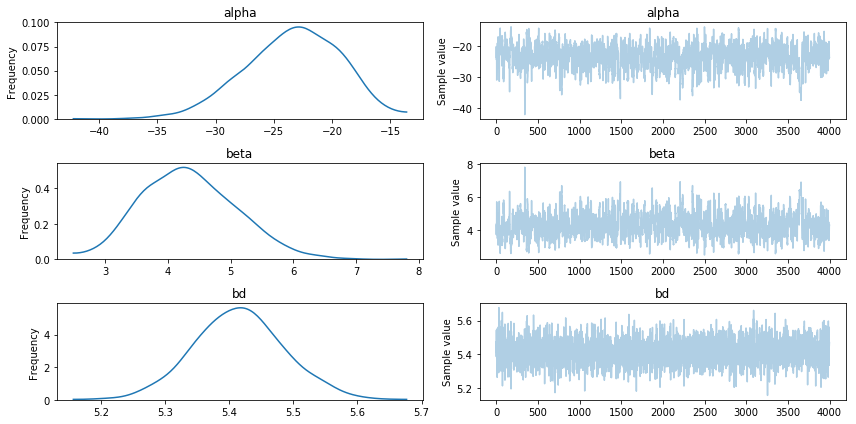

In [27]:
with pm.Model() as model_0:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    
    mu = alpha + pm.math.dot(x_0, beta)
    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    bd = pm.Deterministic('bd', -alpha/beta)
    
    yl = pm.Bernoulli('yl', theta, observed=y_0)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_0 = pm.sample(5000, step, start, chains=1)
chain_0 = trace_0[1000:]
varnames = ['alpha', 'beta', 'bd']
pm.traceplot(chain_0, varnames)
plt.show()

In [28]:
pm.summary(trace_0, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,-23.405751,4.052030,0.147792,-31.393806,-15.861968
beta,4.322759,0.750438,0.027377,2.885640,5.761134
bd,5.415441,0.070116,0.001119,5.281325,5.556985


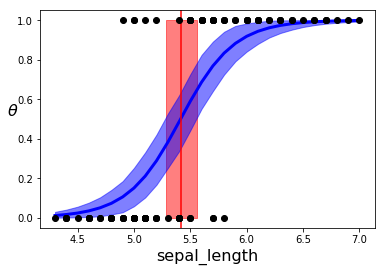

In [33]:
theta = trace_0['theta'].mean(axis=0)
idx = np.argsort(x_0)
plt.plot(x_0[idx], theta[idx], color='b', lw=3)
plt.axvline(trace_0['bd'].mean(), ymax=1, color='r')
bd_hpd = pm.hpd(trace_0['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='r', alpha=0.5)

plt.plot(x_0, y_0, 'o', color='k')
theta_hpd = pm.hpd(trace_0['theta'])[idx]
plt.fill_between(x_0[idx], theta_hpd[:, 0], theta_hpd[:, 1], color='b', alpha=0.5)

plt.xlabel(x_n, fontsize=16)
plt.ylabel(r'$\theta$', rotation=0, fontsize=16)
plt.show()

In [34]:
def classify(n, threshold):
    n = np.array(n)
    mu = trace_0['alpha'].mean() + trace_0['beta'].mean() * n
    prob = 1 / (1 + np.exp(-mu))
    return prob, prob > threshold
classify([5, 5.5, 6], 0.4)

(array([0.14283282, 0.59131911, 0.92627304]), array([False,  True,  True]))

In [37]:
df = iris[(iris['species'] == 'setosa') | (iris['species'] == 'versicolor')]
df = iris.query('species == "setosa" or species == "versicolor"')
y_1 = pd.Categorical(df['species']).codes
x_n = ['sepal_length', 'sepal_width']
x_1 = df[x_n].values

Auto-assigning NUTS sampler...

Initializing NUTS using jitter+adapt_diag...

Sequential sampling (1 chains in 1 job)

NUTS: [beta, alpha]

  0%|          | 0/5500 [00:00<?, ?it/s]

  0%|          | 1/5500 [00:01<2:52:24,  1.88s/it]

  0%|          | 18/5500 [00:01<2:00:29,  1.32s/it]

  1%|          | 38/5500 [00:02<1:24:11,  1.08it/s]

  1%|          | 54/5500 [00:02<58:55,  1.54it/s]  

  1%|▏         | 75/5500 [00:02<41:13,  2.19it/s]

  2%|▏         | 95/5500 [00:02<28:54,  3.12it/s]

  2%|▏         | 111/5500 [00:02<20:21,  4.41it/s]

  2%|▏         | 126/5500 [00:02<14:23,  6.22it/s]

  3%|▎         | 144/5500 [00:02<10:11,  8.76it/s]

  3%|▎         | 170/5500 [00:02<07:12, 12.33it/s]

  3%|▎         | 192/5500 [00:02<05:08, 17.18it/s]

  4%|▍         | 219/5500 [00:03<03:41, 23.86it/s]

  4%|▍         | 242/5500 [00:03<02:41, 32.62it/s]

  5%|▍         | 264/5500 [00:03<01:59, 43.64it/s]

  5%|▌         | 286/5500 [00:03<01:33, 55.63it/s]

  6%|▌         | 306/5500 [00:03<01:15, 68.61it/s]

  6%|▌         | 325/5500 [00:03<01:01, 84.33it/s]

  6%|▋         | 349/5500 [00:03<00:49, 104.58it/s]

  7%|▋         | 370/5500 [00:03<00:41, 122.71it/s]

  7%|▋         | 399/5500 [00:03<00:34, 147.28it/s]

  8%|▊         | 422/5500 [00:04<00:31, 161.65it/s]

  8%|▊         | 452/5500 [00:04<00:27, 186.94it/s]

  9%|▊         | 477/5500 [00:04<00:25, 193.39it/s]

  9%|▉         | 501/5500 [00:04<00:25, 196.82it/s]

 10%|▉         | 524/5500 [00:04<00:24, 199.89it/s]

 10%|▉         | 546/5500 [00:04<00:25, 194.16it/s]

 10%|█         | 567/5500 [00:04<00:25, 192.70it/s]

 11%|█         | 588/5500 [00:04<00:26, 188.09it/s]

 11%|█         | 608/5500 [00:04<00:25, 191.02it/s]

 11%|█▏        | 632/5500 [00:05<00:24, 201.48it/s]

 12%|█▏        | 653/5500 [00:05<00:25, 193.33it/s]

 12%|█▏        | 673/5500 [00:05<00:24, 194.21it/s]

 13%|█▎        | 696/5500 [00:05<00:23, 202.70it/s]

 13%|█▎        | 720/5500 [00:05<00:22, 211.54it/s]

 13%|█▎        | 742/5500 [00:05<00:24, 194.76it/s]

 14%|█▍        | 762/5500 [00:05<00:25, 189.13it/s]

 14%|█▍        | 783/5500 [00:05<00:24, 191.80it/s]

 15%|█▍        | 808/5500 [00:05<00:22, 204.73it/s]

 15%|█▌        | 829/5500 [00:06<00:23, 202.18it/s]

 15%|█▌        | 850/5500 [00:06<00:24, 192.18it/s]

 16%|█▌        | 870/5500 [00:06<00:24, 187.95it/s]

 16%|█▌        | 890/5500 [00:06<00:24, 186.64it/s]

 17%|█▋        | 914/5500 [00:06<00:23, 198.55it/s]

 17%|█▋        | 935/5500 [00:06<00:23, 192.48it/s]

 17%|█▋        | 955/5500 [00:06<00:23, 189.75it/s]

 18%|█▊        | 975/5500 [00:06<00:23, 189.49it/s]

 18%|█▊        | 995/5500 [00:06<00:24, 184.59it/s]

 18%|█▊        | 1014/5500 [00:07<00:24, 185.69it/s]

 19%|█▉        | 1034/5500 [00:07<00:23, 188.74it/s]

 19%|█▉        | 1053/5500 [00:07<00:23, 186.95it/s]

 19%|█▉        | 1072/5500 [00:07<00:23, 184.63it/s]

 20%|█▉        | 1091/5500 [00:07<00:24, 176.41it/s]

 20%|██        | 1109/5500 [00:07<00:26, 164.86it/s]

 21%|██        | 1131/5500 [00:07<00:24, 177.88it/s]

 21%|██        | 1150/5500 [00:07<00:25, 170.20it/s]

 21%|██▏       | 1171/5500 [00:07<00:24, 177.76it/s]

 22%|██▏       | 1192/5500 [00:08<00:23, 185.90it/s]

 22%|██▏       | 1215/5500 [00:08<00:21, 196.79it/s]

 22%|██▏       | 1236/5500 [00:08<00:21, 195.59it/s]

 23%|██▎       | 1256/5500 [00:08<00:21, 196.38it/s]

 23%|██▎       | 1276/5500 [00:08<00:21, 195.20it/s]

 24%|██▎       | 1296/5500 [00:08<00:21, 195.52it/s]

 24%|██▍       | 1316/5500 [00:08<00:21, 190.71it/s]

 24%|██▍       | 1337/5500 [00:08<00:21, 194.54it/s]

 25%|██▍       | 1357/5500 [00:08<00:21, 189.52it/s]

 25%|██▌       | 1378/5500 [00:08<00:21, 191.55it/s]

 25%|██▌       | 1400/5500 [00:09<00:20, 197.19it/s]

 26%|██▌       | 1421/5500 [00:09<00:20, 199.78it/s]

 26%|██▌       | 1442/5500 [00:09<00:20, 196.54it/s]

 27%|██▋       | 1462/5500 [00:09<00:20, 195.89it/s]

 27%|██▋       | 1482/5500 [00:09<00:20, 195.43it/s]

 27%|██▋       | 1503/5500 [00:09<00:20, 196.29it/s]

 28%|██▊       | 1523/5500 [00:09<00:20, 195.14it/s]

 28%|██▊       | 1545/5500 [00:09<00:19, 200.94it/s]

 28%|██▊       | 1566/5500 [00:09<00:20, 191.40it/s]

 29%|██▉       | 1592/5500 [00:10<00:19, 204.47it/s]

 29%|██▉       | 1613/5500 [00:10<00:18, 204.95it/s]

 30%|██▉       | 1634/5500 [00:10<00:19, 198.88it/s]

 30%|███       | 1655/5500 [00:10<00:20, 190.09it/s]

 30%|███       | 1675/5500 [00:10<00:21, 177.60it/s]

 31%|███       | 1694/5500 [00:10<00:21, 180.17it/s]

 31%|███       | 1714/5500 [00:10<00:20, 181.70it/s]

 32%|███▏      | 1733/5500 [00:10<00:20, 183.11it/s]

 32%|███▏      | 1753/5500 [00:10<00:19, 187.39it/s]

 32%|███▏      | 1772/5500 [00:11<00:20, 184.39it/s]

 33%|███▎      | 1791/5500 [00:11<00:20, 180.79it/s]

 33%|███▎      | 1811/5500 [00:11<00:20, 184.15it/s]

 33%|███▎      | 1837/5500 [00:11<00:18, 201.39it/s]

 34%|███▍      | 1858/5500 [00:11<00:19, 186.58it/s]

 34%|███▍      | 1878/5500 [00:11<00:19, 186.22it/s]

 35%|███▍      | 1898/5500 [00:11<00:19, 180.92it/s]

 35%|███▍      | 1919/5500 [00:11<00:19, 186.31it/s]

 35%|███▌      | 1940/5500 [00:11<00:18, 191.31it/s]

 36%|███▌      | 1962/5500 [00:12<00:17, 198.61it/s]

 36%|███▌      | 1985/5500 [00:12<00:17, 205.48it/s]

 36%|███▋      | 2006/5500 [00:12<00:17, 202.11it/s]

 37%|███▋      | 2028/5500 [00:12<00:16, 206.06it/s]

 37%|███▋      | 2052/5500 [00:12<00:16, 211.83it/s]

 38%|███▊      | 2074/5500 [00:12<00:17, 199.17it/s]

 38%|███▊      | 2095/5500 [00:12<00:16, 201.19it/s]

 38%|███▊      | 2116/5500 [00:12<00:17, 195.30it/s]

 39%|███▉      | 2139/5500 [00:12<00:16, 203.53it/s]

 39%|███▉      | 2162/5500 [00:12<00:15, 210.29it/s]

 40%|███▉      | 2184/5500 [00:13<00:16, 202.03it/s]

 40%|████      | 2206/5500 [00:13<00:16, 204.28it/s]

 41%|████      | 2228/5500 [00:13<00:15, 205.89it/s]

 41%|████      | 2252/5500 [00:13<00:15, 211.70it/s]

 41%|████▏     | 2274/5500 [00:13<00:16, 200.17it/s]

 42%|████▏     | 2295/5500 [00:13<00:15, 200.76it/s]

 42%|████▏     | 2316/5500 [00:13<00:16, 196.65it/s]

 42%|████▏     | 2336/5500 [00:13<00:16, 190.37it/s]

 43%|████▎     | 2356/5500 [00:13<00:16, 189.38it/s]

 43%|████▎     | 2376/5500 [00:14<00:16, 185.03it/s]

 44%|████▎     | 2398/5500 [00:14<00:16, 193.32it/s]

 44%|████▍     | 2418/5500 [00:14<00:17, 175.32it/s]

 44%|████▍     | 2439/5500 [00:14<00:16, 181.17it/s]

 45%|████▍     | 2460/5500 [00:14<00:16, 188.50it/s]

 45%|████▌     | 2480/5500 [00:14<00:16, 184.95it/s]

 45%|████▌     | 2500/5500 [00:14<00:15, 188.21it/s]

 46%|████▌     | 2520/5500 [00:14<00:15, 186.30it/s]

 46%|████▌     | 2539/5500 [00:14<00:16, 180.52it/s]

 47%|████▋     | 2558/5500 [00:15<00:17, 171.88it/s]

 47%|████▋     | 2579/5500 [00:15<00:16, 179.04it/s]

 47%|████▋     | 2598/5500 [00:15<00:16, 180.69it/s]

 48%|████▊     | 2617/5500 [00:15<00:16, 177.28it/s]

 48%|████▊     | 2635/5500 [00:15<00:16, 170.56it/s]

 48%|████▊     | 2653/5500 [00:15<00:16, 172.84it/s]

 49%|████▊     | 2674/5500 [00:15<00:15, 182.10it/s]

 49%|████▉     | 2695/5500 [00:15<00:14, 188.18it/s]

 49%|████▉     | 2715/5500 [00:15<00:15, 181.23it/s]

 50%|████▉     | 2734/5500 [00:16<00:15, 174.23it/s]

 50%|█████     | 2754/5500 [00:16<00:15, 179.82it/s]

 50%|█████     | 2773/5500 [00:16<00:15, 180.21it/s]

 51%|█████     | 2797/5500 [00:16<00:14, 191.56it/s]

 51%|█████     | 2817/5500 [00:16<00:14, 184.42it/s]

 52%|█████▏    | 2841/5500 [00:16<00:13, 196.78it/s]

 52%|█████▏    | 2870/5500 [00:16<00:12, 216.37it/s]

 53%|█████▎    | 2893/5500 [00:16<00:12, 205.59it/s]

 53%|█████▎    | 2917/5500 [00:16<00:12, 214.19it/s]

 53%|█████▎    | 2940/5500 [00:17<00:12, 205.42it/s]

 54%|█████▍    | 2962/5500 [00:17<00:12, 200.49it/s]

 54%|█████▍    | 2984/5500 [00:17<00:12, 203.74it/s]

 55%|█████▍    | 3009/5500 [00:17<00:11, 214.11it/s]

 55%|█████▌    | 3031/5500 [00:17<00:12, 202.23it/s]

 55%|█████▌    | 3052/5500 [00:17<00:12, 199.89it/s]

 56%|█████▌    | 3073/5500 [00:17<00:12, 196.62it/s]

 56%|█████▋    | 3097/5500 [00:17<00:11, 204.76it/s]

 57%|█████▋    | 3120/5500 [00:17<00:11, 207.77it/s]

 57%|█████▋    | 3142/5500 [00:18<00:11, 210.75it/s]

 58%|█████▊    | 3166/5500 [00:18<00:10, 217.03it/s]

 58%|█████▊    | 3188/5500 [00:18<00:10, 212.92it/s]

 58%|█████▊    | 3210/5500 [00:18<00:10, 210.14it/s]

 59%|█████▉    | 3232/5500 [00:18<00:11, 203.05it/s]

 59%|█████▉    | 3253/5500 [00:18<00:11, 203.95it/s]

 60%|█████▉    | 3274/5500 [00:18<00:10, 205.19it/s]

 60%|█████▉    | 3295/5500 [00:18<00:11, 195.70it/s]

 60%|██████    | 3317/5500 [00:18<00:10, 198.63it/s]

 61%|██████    | 3337/5500 [00:18<00:11, 196.17it/s]

 61%|██████    | 3359/5500 [00:19<00:10, 200.60it/s]

 61%|██████▏   | 3380/5500 [00:19<00:11, 187.60it/s]

 62%|██████▏   | 3407/5500 [00:19<00:10, 205.15it/s]

 62%|██████▏   | 3429/5500 [00:19<00:10, 192.43it/s]

 63%|██████▎   | 3454/5500 [00:19<00:10, 204.23it/s]

 63%|██████▎   | 3477/5500 [00:19<00:09, 210.23it/s]

 64%|██████▎   | 3499/5500 [00:19<00:10, 198.71it/s]

 64%|██████▍   | 3520/5500 [00:19<00:09, 201.45it/s]

 64%|██████▍   | 3545/5500 [00:20<00:09, 210.19it/s]

 65%|██████▍   | 3567/5500 [00:20<00:10, 190.93it/s]

 65%|██████▌   | 3590/5500 [00:20<00:09, 200.19it/s]

 66%|██████▌   | 3611/5500 [00:20<00:10, 185.86it/s]

 66%|██████▌   | 3632/5500 [00:20<00:09, 189.43it/s]

 66%|██████▋   | 3652/5500 [00:20<00:10, 182.03it/s]

 67%|██████▋   | 3671/5500 [00:20<00:10, 179.19it/s]

 67%|██████▋   | 3693/5500 [00:20<00:09, 187.86it/s]

 68%|██████▊   | 3713/5500 [00:20<00:10, 172.15it/s]

 68%|██████▊   | 3732/5500 [00:21<00:10, 174.27it/s]

 68%|██████▊   | 3752/5500 [00:21<00:09, 180.33it/s]

 69%|██████▊   | 3772/5500 [00:21<00:09, 185.35it/s]

 69%|██████▉   | 3792/5500 [00:21<00:09, 189.03it/s]

 69%|██████▉   | 3813/5500 [00:21<00:08, 191.73it/s]

 70%|██████▉   | 3833/5500 [00:21<00:08, 191.96it/s]

 70%|███████   | 3853/5500 [00:21<00:08, 187.80it/s]

 70%|███████   | 3877/5500 [00:21<00:08, 198.47it/s]

 71%|███████   | 3898/5500 [00:21<00:07, 201.27it/s]

 71%|███████▏  | 3927/5500 [00:21<00:07, 219.16it/s]

 72%|███████▏  | 3950/5500 [00:22<00:07, 210.76it/s]

 72%|███████▏  | 3972/5500 [00:22<00:07, 206.90it/s]

 73%|███████▎  | 3994/5500 [00:22<00:07, 192.49it/s]

 73%|███████▎  | 4015/5500 [00:22<00:07, 194.74it/s]

 73%|███████▎  | 4036/5500 [00:22<00:07, 198.57it/s]

 74%|███████▍  | 4057/5500 [00:22<00:07, 197.94it/s]

 74%|███████▍  | 4077/5500 [00:22<00:07, 194.56it/s]

 74%|███████▍  | 4097/5500 [00:22<00:07, 181.79it/s]

 75%|███████▍  | 4116/5500 [00:23<00:07, 177.03it/s]

 75%|███████▌  | 4136/5500 [00:23<00:07, 181.40it/s]

 76%|███████▌  | 4166/5500 [00:23<00:06, 203.35it/s]

 76%|███████▌  | 4188/5500 [00:23<00:06, 193.84it/s]

 77%|███████▋  | 4213/5500 [00:23<00:06, 206.36it/s]

 77%|███████▋  | 4235/5500 [00:23<00:06, 207.36it/s]

 77%|███████▋  | 4257/5500 [00:23<00:06, 195.86it/s]

 78%|███████▊  | 4278/5500 [00:23<00:06, 191.22it/s]

 78%|███████▊  | 4298/5500 [00:23<00:06, 181.20it/s]

 78%|███████▊  | 4317/5500 [00:24<00:06, 181.70it/s]

 79%|███████▉  | 4336/5500 [00:24<00:06, 179.99it/s]

 79%|███████▉  | 4357/5500 [00:24<00:06, 186.10it/s]

 80%|███████▉  | 4376/5500 [00:24<00:06, 164.05it/s]

 80%|███████▉  | 4398/5500 [00:24<00:06, 176.36it/s]

 80%|████████  | 4421/5500 [00:24<00:05, 189.21it/s]

 81%|████████  | 4442/5500 [00:24<00:05, 192.91it/s]

 81%|████████  | 4462/5500 [00:24<00:05, 181.27it/s]

 81%|████████▏ | 4481/5500 [00:24<00:05, 182.27it/s]

 82%|████████▏ | 4500/5500 [00:25<00:05, 183.51it/s]

 82%|████████▏ | 4519/5500 [00:25<00:05, 179.68it/s]

 83%|████████▎ | 4541/5500 [00:25<00:05, 189.21it/s]

 83%|████████▎ | 4561/5500 [00:25<00:05, 187.51it/s]

 83%|████████▎ | 4580/5500 [00:25<00:04, 185.55it/s]

 84%|████████▎ | 4599/5500 [00:25<00:04, 182.09it/s]

 84%|████████▍ | 4622/5500 [00:25<00:04, 192.81it/s]

 84%|████████▍ | 4642/5500 [00:25<00:04, 185.23it/s]

 85%|████████▍ | 4665/5500 [00:25<00:04, 193.30it/s]

 85%|████████▌ | 4685/5500 [00:25<00:04, 194.18it/s]

 86%|████████▌ | 4705/5500 [00:26<00:04, 195.38it/s]

 86%|████████▌ | 4725/5500 [00:26<00:03, 195.65it/s]

 86%|████████▋ | 4745/5500 [00:26<00:04, 181.95it/s]

 87%|████████▋ | 4772/5500 [00:26<00:03, 199.50it/s]

 87%|████████▋ | 4793/5500 [00:26<00:03, 198.58it/s]

 88%|████████▊ | 4815/5500 [00:26<00:03, 204.04it/s]

 88%|████████▊ | 4836/5500 [00:26<00:03, 199.98it/s]

 88%|████████▊ | 4857/5500 [00:26<00:03, 194.50it/s]

 89%|████████▊ | 4881/5500 [00:26<00:03, 203.66it/s]

 89%|████████▉ | 4903/5500 [00:27<00:02, 204.30it/s]

 90%|████████▉ | 4924/5500 [00:27<00:02, 204.84it/s]

 90%|█████████ | 4950/5500 [00:27<00:02, 215.55it/s]

 90%|█████████ | 4972/5500 [00:27<00:02, 211.92it/s]

 91%|█████████ | 4994/5500 [00:27<00:02, 210.05it/s]

 91%|█████████▏| 5019/5500 [00:27<00:02, 220.11it/s]

 92%|█████████▏| 5042/5500 [00:27<00:02, 213.14it/s]

 92%|█████████▏| 5064/5500 [00:27<00:02, 199.97it/s]

 93%|█████████▎| 5088/5500 [00:27<00:01, 207.29it/s]

 93%|█████████▎| 5110/5500 [00:28<00:02, 184.49it/s]

 93%|█████████▎| 5135/5500 [00:28<00:01, 199.80it/s]

 94%|█████████▎| 5156/5500 [00:28<00:01, 198.79it/s]

 94%|█████████▍| 5182/5500 [00:28<00:01, 211.86it/s]

 95%|█████████▍| 5204/5500 [00:28<00:01, 189.42it/s]

 95%|█████████▌| 5227/5500 [00:28<00:01, 199.54it/s]

 95%|█████████▌| 5252/5500 [00:28<00:01, 209.78it/s]

 96%|█████████▌| 5274/5500 [00:28<00:01, 203.94it/s]

 96%|█████████▋| 5295/5500 [00:28<00:01, 202.81it/s]

 97%|█████████▋| 5317/5500 [00:29<00:00, 207.15it/s]

 97%|█████████▋| 5338/5500 [00:29<00:00, 196.95it/s]

 98%|█████████▊| 5364/5500 [00:29<00:00, 210.91it/s]

 98%|█████████▊| 5386/5500 [00:29<00:00, 208.76it/s]

 98%|█████████▊| 5408/5500 [00:29<00:00, 211.46it/s]

 99%|█████████▊| 5430/5500 [00:29<00:00, 202.22it/s]

 99%|█████████▉| 5451/5500 [00:29<00:00, 197.63it/s]

100%|█████████▉| 5473/5500 [00:29<00:00, 200.57it/s]

100%|█████████▉| 5494/5500 [00:30<00:00, 176.25it/s]

100%|██████████| 5500/5500 [00:30<00:00, 183.03it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

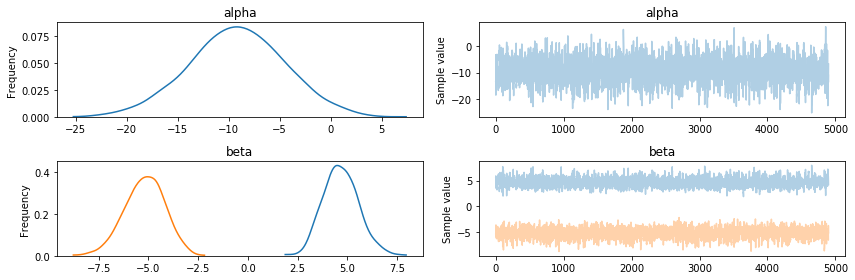

In [38]:
with pm.Model() as model_1:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=2, shape=len(x_n))
    
    mu = alpha + pm.math.dot(x_1, beta)
    theta = 1 / (1 + pm.math.exp(-mu))
    bd = pm.Deterministic('bd', -alpha/beta[1] - beta[0]/beta[1] * x_1[:, 0])
    
    yl = pm.Bernoulli('yl', theta, observed=y_1)

    trace_1 = pm.sample(5000,  chains=1)
chain_1 = trace_1[100:]
varnames = ['alpha', 'beta']
pm.traceplot(chain_1, varnames)
plt.show()

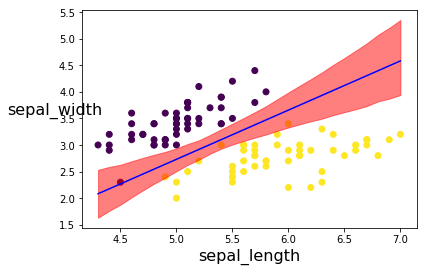

In [39]:
idx = np.argsort(x_1[:, 0])
bd = chain_1['bd'].mean(0)[idx]
plt.scatter(x_1[:, 0], x_1[:, 1], c=y_0)
plt.plot(x_1[:, 0][idx], bd, color='b')

bd_hpd = pm.hpd(chain_1['bd'])[idx]
plt.fill_between(x_1[:, 0][idx], bd_hpd[:, 0], bd_hpd[:, 1], color='r', alpha=0.5)

plt.xlabel(x_n[0], fontsize=16)
plt.ylabel(x_n[1], rotation=0, fontsize=16)
plt.show()

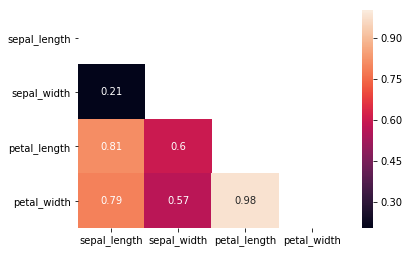

In [40]:
corr = iris[iris['species'] != 'virginica'].corr()
mask = np.tri(*corr.shape).T
sns.heatmap(corr.abs(), mask=mask, annot=True)

In [41]:
df = iris.query('species == "setosa" or species == "versicolor"')
df = df[45:]
y_3 = pd.Categorical(df['species']).codes
x_n = ['sepal_length', 'sepal_width']
x_3 = df[x_n].values

Auto-assigning NUTS sampler...

Initializing NUTS using jitter+adapt_diag...

Sequential sampling (1 chains in 1 job)

NUTS: [beta, alpha]

  0%|          | 0/5500 [00:00<?, ?it/s]

  0%|          | 12/5500 [00:00<00:47, 115.50it/s]

  0%|          | 18/5500 [00:00<01:03, 86.17it/s] 

  1%|          | 30/5500 [00:00<00:58, 93.93it/s]

  1%|          | 49/5500 [00:00<00:50, 108.66it/s]

  1%|▏         | 69/5500 [00:00<00:43, 124.99it/s]

  2%|▏         | 94/5500 [00:00<00:37, 144.53it/s]

  2%|▏         | 123/5500 [00:00<00:31, 168.39it/s]

  3%|▎         | 144/5500 [00:00<00:30, 177.71it/s]

  3%|▎         | 166/5500 [00:00<00:28, 186.25it/s]

  3%|▎         | 186/5500 [00:01<00:28, 184.95it/s]

  4%|▍         | 209/5500 [00:01<00:27, 195.55it/s]

  4%|▍         | 233/5500 [00:01<00:25, 206.04it/s]

  5%|▍         | 261/5500 [00:01<00:23, 222.76it/s]

  5%|▌         | 289/5500 [00:01<00:22, 236.18it/s]

  6%|▌         | 319/5500 [00:01<00:20, 251.71it/s]

  6%|▋         | 346/5500 [00:01<00:21, 243.79it/s]

  7%|▋         | 379/5500 [00:01<00:19, 263.32it/s]

  7%|▋         | 407/5500 [00:01<00:19, 262.17it/s]

  8%|▊         | 437/5500 [00:02<00:18, 271.08it/s]

  8%|▊         | 465/5500 [00:02<00:19, 254.39it/s]

  9%|▉         | 492/5500 [00:02<00:19, 256.75it/s]

  9%|▉         | 522/5500 [00:02<00:18, 265.58it/s]

 10%|▉         | 549/5500 [00:02<00:18, 263.07it/s]

 10%|█         | 576/5500 [00:02<00:20, 237.26it/s]

 11%|█         | 605/5500 [00:02<00:19, 248.44it/s]

 12%|█▏        | 637/5500 [00:02<00:18, 264.39it/s]

 12%|█▏        | 665/5500 [00:02<00:18, 255.72it/s]

 13%|█▎        | 692/5500 [00:03<00:19, 242.43it/s]

 13%|█▎        | 717/5500 [00:03<00:20, 236.40it/s]

 14%|█▎        | 749/5500 [00:03<00:18, 254.13it/s]

 14%|█▍        | 779/5500 [00:03<00:17, 262.92it/s]

 15%|█▍        | 807/5500 [00:03<00:17, 263.37it/s]

 15%|█▌        | 834/5500 [00:03<00:17, 264.62it/s]

 16%|█▌        | 861/5500 [00:03<00:17, 262.41it/s]

 16%|█▌        | 888/5500 [00:03<00:17, 260.89it/s]

 17%|█▋        | 916/5500 [00:03<00:17, 265.67it/s]

 17%|█▋        | 943/5500 [00:03<00:17, 260.09it/s]

 18%|█▊        | 970/5500 [00:04<00:18, 248.55it/s]

 18%|█▊        | 996/5500 [00:04<00:18, 249.06it/s]

 19%|█▊        | 1022/5500 [00:04<00:17, 250.86it/s]

 19%|█▉        | 1057/5500 [00:04<00:16, 273.58it/s]

 20%|█▉        | 1086/5500 [00:04<00:16, 261.82it/s]

 20%|██        | 1114/5500 [00:04<00:16, 263.33it/s]

 21%|██        | 1143/5500 [00:04<00:16, 270.13it/s]

 21%|██▏       | 1171/5500 [00:04<00:15, 271.51it/s]

 22%|██▏       | 1199/5500 [00:04<00:15, 272.49it/s]

 22%|██▏       | 1227/5500 [00:05<00:15, 273.97it/s]

 23%|██▎       | 1255/5500 [00:05<00:15, 275.03it/s]

 23%|██▎       | 1289/5500 [00:05<00:14, 288.86it/s]

 24%|██▍       | 1319/5500 [00:05<00:14, 282.31it/s]

 25%|██▍       | 1349/5500 [00:05<00:14, 285.02it/s]

 25%|██▌       | 1378/5500 [00:05<00:15, 266.83it/s]

 26%|██▌       | 1407/5500 [00:05<00:15, 270.40it/s]

 26%|██▌       | 1435/5500 [00:05<00:15, 261.08it/s]

 27%|██▋       | 1462/5500 [00:05<00:15, 253.38it/s]

 27%|██▋       | 1488/5500 [00:06<00:16, 245.30it/s]

 28%|██▊       | 1514/5500 [00:06<00:16, 247.47it/s]

 28%|██▊       | 1544/5500 [00:06<00:15, 258.56it/s]

 29%|██▊       | 1571/5500 [00:06<00:15, 260.45it/s]

 29%|██▉       | 1598/5500 [00:06<00:15, 245.39it/s]

 30%|██▉       | 1628/5500 [00:06<00:15, 257.63it/s]

 30%|███       | 1658/5500 [00:06<00:14, 266.95it/s]

 31%|███       | 1686/5500 [00:06<00:15, 251.16it/s]

 31%|███       | 1716/5500 [00:06<00:14, 263.43it/s]

 32%|███▏      | 1749/5500 [00:06<00:13, 279.76it/s]

 32%|███▏      | 1779/5500 [00:07<00:13, 282.40it/s]

 33%|███▎      | 1810/5500 [00:07<00:12, 288.60it/s]

 33%|███▎      | 1840/5500 [00:07<00:12, 285.37it/s]

 34%|███▍      | 1869/5500 [00:07<00:12, 283.47it/s]

 35%|███▍      | 1898/5500 [00:07<00:13, 271.85it/s]

 35%|███▌      | 1926/5500 [00:07<00:13, 265.74it/s]

 36%|███▌      | 1953/5500 [00:07<00:13, 261.66it/s]

 36%|███▌      | 1981/5500 [00:07<00:13, 261.74it/s]

 37%|███▋      | 2011/5500 [00:07<00:12, 271.49it/s]

 37%|███▋      | 2041/5500 [00:08<00:12, 278.76it/s]

 38%|███▊      | 2070/5500 [00:08<00:12, 267.32it/s]

 38%|███▊      | 2101/5500 [00:08<00:12, 278.16it/s]

 39%|███▊      | 2130/5500 [00:08<00:12, 266.20it/s]

 39%|███▉      | 2157/5500 [00:08<00:13, 254.56it/s]

 40%|███▉      | 2184/5500 [00:08<00:12, 256.13it/s]

 40%|████      | 2210/5500 [00:08<00:13, 251.39it/s]

 41%|████      | 2236/5500 [00:08<00:14, 230.38it/s]

 41%|████      | 2260/5500 [00:08<00:14, 231.24it/s]

 42%|████▏     | 2286/5500 [00:09<00:13, 235.35it/s]

 42%|████▏     | 2310/5500 [00:09<00:13, 229.34it/s]

 42%|████▏     | 2336/5500 [00:09<00:13, 236.52it/s]

 43%|████▎     | 2366/5500 [00:09<00:12, 250.72it/s]

 43%|████▎     | 2392/5500 [00:09<00:12, 251.31it/s]

 44%|████▍     | 2424/5500 [00:09<00:11, 266.66it/s]

 45%|████▍     | 2452/5500 [00:09<00:11, 269.05it/s]

 45%|████▌     | 2483/5500 [00:09<00:10, 278.72it/s]

 46%|████▌     | 2512/5500 [00:09<00:11, 249.38it/s]

 46%|████▋     | 2544/5500 [00:10<00:11, 266.46it/s]

 47%|████▋     | 2572/5500 [00:10<00:11, 250.86it/s]

 47%|████▋     | 2598/5500 [00:10<00:11, 249.95it/s]

 48%|████▊     | 2624/5500 [00:10<00:11, 243.04it/s]

 48%|████▊     | 2649/5500 [00:10<00:11, 242.31it/s]

 49%|████▊     | 2674/5500 [00:10<00:11, 243.22it/s]

 49%|████▉     | 2701/5500 [00:10<00:11, 246.63it/s]

 50%|████▉     | 2726/5500 [00:10<00:11, 246.24it/s]

 50%|█████     | 2756/5500 [00:10<00:10, 255.65it/s]

 51%|█████     | 2783/5500 [00:11<00:10, 257.64it/s]

 51%|█████     | 2811/5500 [00:11<00:10, 258.92it/s]

 52%|█████▏    | 2837/5500 [00:11<00:10, 246.78it/s]

 52%|█████▏    | 2862/5500 [00:11<00:10, 244.19it/s]

 52%|█████▏    | 2887/5500 [00:11<00:11, 234.89it/s]

 53%|█████▎    | 2911/5500 [00:11<00:10, 235.78it/s]

 53%|█████▎    | 2935/5500 [00:11<00:10, 235.71it/s]

 54%|█████▍    | 2959/5500 [00:11<00:10, 233.59it/s]

 54%|█████▍    | 2985/5500 [00:11<00:10, 239.67it/s]

 55%|█████▍    | 3014/5500 [00:11<00:09, 252.24it/s]

 55%|█████▌    | 3043/5500 [00:12<00:09, 260.45it/s]

 56%|█████▌    | 3070/5500 [00:12<00:09, 257.30it/s]

 56%|█████▋    | 3102/5500 [00:12<00:08, 272.05it/s]

 57%|█████▋    | 3130/5500 [00:12<00:08, 267.40it/s]

 57%|█████▋    | 3158/5500 [00:12<00:08, 260.55it/s]

 58%|█████▊    | 3186/5500 [00:12<00:08, 263.18it/s]

 58%|█████▊    | 3213/5500 [00:12<00:09, 249.82it/s]

 59%|█████▉    | 3239/5500 [00:12<00:09, 246.40it/s]

 59%|█████▉    | 3264/5500 [00:12<00:09, 236.32it/s]

 60%|█████▉    | 3288/5500 [00:13<00:09, 224.82it/s]

 60%|██████    | 3317/5500 [00:13<00:09, 238.76it/s]

 61%|██████    | 3343/5500 [00:13<00:08, 244.14it/s]

 61%|██████▏   | 3374/5500 [00:13<00:08, 259.52it/s]

 62%|██████▏   | 3401/5500 [00:13<00:08, 261.13it/s]

 62%|██████▏   | 3428/5500 [00:13<00:07, 259.25it/s]

 63%|██████▎   | 3455/5500 [00:13<00:07, 257.22it/s]

 63%|██████▎   | 3481/5500 [00:13<00:07, 255.84it/s]

 64%|██████▍   | 3512/5500 [00:13<00:07, 265.90it/s]

 64%|██████▍   | 3539/5500 [00:13<00:07, 266.41it/s]

 65%|██████▍   | 3566/5500 [00:14<00:07, 249.06it/s]

 65%|██████▌   | 3592/5500 [00:14<00:07, 248.00it/s]

 66%|██████▌   | 3618/5500 [00:14<00:08, 233.92it/s]

 66%|██████▌   | 3643/5500 [00:14<00:07, 237.23it/s]

 67%|██████▋   | 3667/5500 [00:14<00:07, 231.92it/s]

 67%|██████▋   | 3691/5500 [00:14<00:07, 230.31it/s]

 68%|██████▊   | 3720/5500 [00:14<00:07, 243.68it/s]

 68%|██████▊   | 3745/5500 [00:14<00:07, 234.57it/s]

 69%|██████▊   | 3775/5500 [00:14<00:06, 250.43it/s]

 69%|██████▉   | 3801/5500 [00:15<00:06, 244.72it/s]

 70%|██████▉   | 3826/5500 [00:15<00:07, 231.95it/s]

 70%|███████   | 3855/5500 [00:15<00:06, 242.52it/s]

 71%|███████   | 3880/5500 [00:15<00:06, 244.08it/s]

 71%|███████   | 3905/5500 [00:15<00:06, 230.92it/s]

 72%|███████▏  | 3935/5500 [00:15<00:06, 246.90it/s]

 72%|███████▏  | 3961/5500 [00:15<00:06, 230.14it/s]

 73%|███████▎  | 3993/5500 [00:15<00:06, 250.19it/s]

 73%|███████▎  | 4021/5500 [00:15<00:05, 253.61it/s]

 74%|███████▎  | 4048/5500 [00:16<00:05, 256.92it/s]

 74%|███████▍  | 4088/5500 [00:16<00:04, 286.01it/s]

 75%|███████▍  | 4118/5500 [00:16<00:05, 269.10it/s]

 75%|███████▌  | 4147/5500 [00:16<00:04, 272.03it/s]

 76%|███████▌  | 4176/5500 [00:16<00:04, 267.31it/s]

 76%|███████▋  | 4204/5500 [00:16<00:04, 264.17it/s]

 77%|███████▋  | 4237/5500 [00:16<00:04, 279.64it/s]

 78%|███████▊  | 4266/5500 [00:16<00:04, 270.88it/s]

 78%|███████▊  | 4294/5500 [00:16<00:04, 267.37it/s]

 79%|███████▊  | 4322/5500 [00:17<00:04, 269.55it/s]

 79%|███████▉  | 4350/5500 [00:17<00:04, 261.25it/s]

 80%|███████▉  | 4377/5500 [00:17<00:04, 250.68it/s]

 80%|████████  | 4403/5500 [00:17<00:04, 236.87it/s]

 81%|████████  | 4434/5500 [00:17<00:04, 253.72it/s]

 81%|████████  | 4460/5500 [00:17<00:04, 252.67it/s]

 82%|████████▏ | 4486/5500 [00:17<00:04, 253.41it/s]

 82%|████████▏ | 4513/5500 [00:17<00:03, 257.51it/s]

 83%|████████▎ | 4540/5500 [00:17<00:03, 257.48it/s]

 83%|████████▎ | 4566/5500 [00:18<00:03, 245.17it/s]

 83%|████████▎ | 4591/5500 [00:18<00:03, 245.95it/s]

 84%|████████▍ | 4619/5500 [00:18<00:03, 253.94it/s]

 84%|████████▍ | 4645/5500 [00:18<00:03, 235.66it/s]

 85%|████████▌ | 4676/5500 [00:18<00:03, 250.91it/s]

 85%|████████▌ | 4702/5500 [00:18<00:03, 247.14it/s]

 86%|████████▌ | 4728/5500 [00:18<00:03, 246.66it/s]

 86%|████████▋ | 4753/5500 [00:18<00:03, 243.39it/s]

 87%|████████▋ | 4780/5500 [00:18<00:02, 249.49it/s]

 87%|████████▋ | 4806/5500 [00:19<00:02, 240.71it/s]

 88%|████████▊ | 4834/5500 [00:19<00:02, 248.02it/s]

 88%|████████▊ | 4860/5500 [00:19<00:02, 247.27it/s]

 89%|████████▉ | 4887/5500 [00:19<00:02, 252.33it/s]

 89%|████████▉ | 4913/5500 [00:19<00:02, 248.82it/s]

 90%|████████▉ | 4938/5500 [00:19<00:02, 243.43it/s]

 90%|█████████ | 4963/5500 [00:19<00:02, 244.00it/s]

 91%|█████████ | 4988/5500 [00:19<00:02, 233.46it/s]

 91%|█████████▏| 5027/5500 [00:19<00:01, 263.86it/s]

 92%|█████████▏| 5060/5500 [00:19<00:01, 277.98it/s]

 93%|█████████▎| 5089/5500 [00:20<00:01, 279.93it/s]

 93%|█████████▎| 5118/5500 [00:20<00:01, 271.84it/s]

 94%|█████████▎| 5146/5500 [00:20<00:01, 251.43it/s]

 94%|█████████▍| 5173/5500 [00:20<00:01, 255.35it/s]

 95%|█████████▍| 5203/5500 [00:20<00:01, 266.64it/s]

 95%|█████████▌| 5231/5500 [00:20<00:01, 246.99it/s]

 96%|█████████▌| 5257/5500 [00:20<00:00, 247.25it/s]

 96%|█████████▌| 5283/5500 [00:20<00:00, 243.28it/s]

 97%|█████████▋| 5312/5500 [00:20<00:00, 255.03it/s]

 97%|█████████▋| 5338/5500 [00:21<00:00, 252.84it/s]

 98%|█████████▊| 5364/5500 [00:21<00:00, 241.53it/s]

 98%|█████████▊| 5389/5500 [00:21<00:00, 239.18it/s]

 98%|█████████▊| 5414/5500 [00:21<00:00, 227.22it/s]

 99%|█████████▉| 5437/5500 [00:21<00:00, 225.43it/s]

 99%|█████████▉| 5460/5500 [00:21<00:00, 224.20it/s]

100%|█████████▉| 5483/5500 [00:21<00:00, 224.00it/s]

100%|██████████| 5500/5500 [00:21<00:00, 251.96it/s]

There were 93 divergences after tuning. Increase `target_accept` or reparameterize.

Only one chain was sampled, this makes it impossible to run some convergence checks

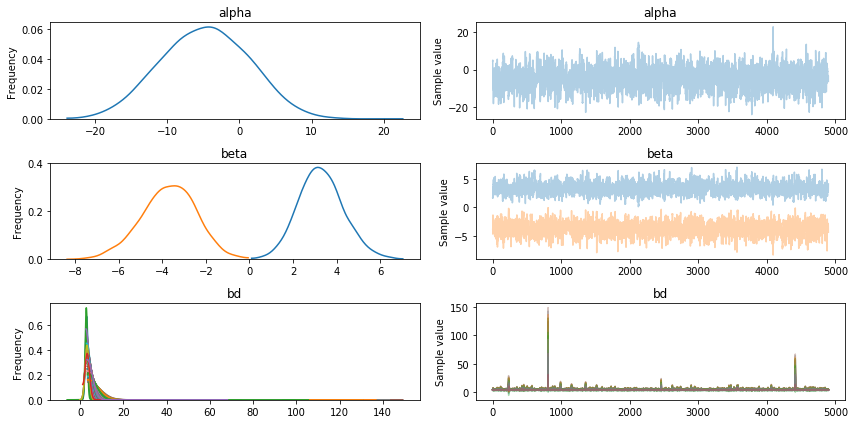

In [42]:
with pm.Model() as model_1:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=2, shape=len(x_n))
    
    mu = alpha + pm.math.dot(x_3, beta)
    theta = 1 / (1 + pm.math.exp(-mu))
    bd = pm.Deterministic('bd', -alpha/beta[1] - beta[0]/beta[1] * x_3[:, 0])
    
    yl = pm.Bernoulli('yl', theta, observed=y_3)

    trace_3 = pm.sample(5000,  chains=1)
chain_3 = trace_3[100:]
varnames = ['alpha', 'beta']
pm.traceplot(chain_3)
plt.show()

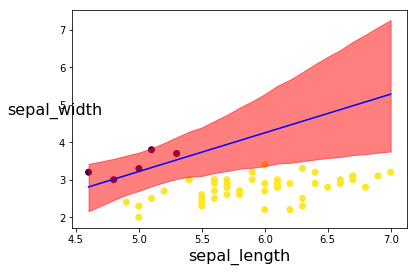

In [43]:
idx = np.argsort(x_3[:, 0])
bd = chain_3['bd'].mean(0)[idx]
plt.scatter(x_3[:, 0], x_3[:, 1], c=y_3)
plt.plot(x_3[:, 0][idx], bd, color='b')

bd_hpd = pm.hpd(chain_3['bd'])[idx]
plt.fill_between(x_3[:, 0][idx], bd_hpd[:, 0], bd_hpd[:, 1], color='r', alpha=0.5)

plt.xlabel(x_n[0], fontsize=16)
plt.ylabel(x_n[1], rotation=0, fontsize=16)
plt.show()

In [2]:
iris = sns.load_dataset('iris')
y_s = pd.Categorical(iris['species']).codes
x_n = iris.columns[:-1]
x_s = iris[x_n].values
x_s = (x_s - x_s.mean(axis=0))/x_s.std(axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


logp = -188.97, ||grad|| = 147.22:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -44.823, ||grad|| = 0.37337:   0%|          | 10/5000 [00:00<00:04, 1001.05it/s]

logp = -44.794, ||grad|| = 0.013942:   0%|          | 20/5000 [00:00<00:03, 1251.27it/s]

logp = -44.794, ||grad|| = 0.00029813:   1%|          | 30/5000 [00:00<00:03, 1365.01it/s]

logp = -44.794, ||grad|| = 0.00029813: 100%|██████████| 32/32 [00:00<00:00, 1334.68it/s]  

C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


Sequential sampling (1 chains in 1 job)

NUTS: [beta, alpha]

  0%|          | 0/2500 [00:00<?, ?it/s]

  1%|          | 15/2500 [00:00<00:17, 140.33it/s]

  1%|          | 22/2500 [00:00<00:23, 106.89it/s]

  1%|▏         | 32/2500 [00:00<00:23, 103.46it/s]

  2%|▏         | 42/2500 [00:00<00:24, 99.67it/s] 

  2%|▏         | 55/2500 [00:00<00:23, 105.64it/s]

  3%|▎         | 64/2500 [00:00<00:27, 87.55it/s] 

  3%|▎         | 76/2500 [00:00<00:25, 94.41it/s]

  4%|▎         | 89/2500 [00:00<00:23, 101.67it/s]

  4%|▍         | 104/2500 [00:00<00:21, 110.83it/s]

  5%|▍         | 121/2500 [00:01<00:19, 122.18it/s]

  5%|▌         | 136/2500 [00:01<00:18, 128.42it/s]

  6%|▌         | 151/2500 [00:01<00:17, 132.82it/s]

  7%|▋         | 168/2500 [00:01<00:16, 140.43it/s]

  7%|▋         | 183/2500 [00:01<00:16, 138.84it/s]

  8%|▊         | 198/2500 [00:01<00:17, 134.42it/s]

  9%|▊         | 215/2500 [00:01<00:16, 142.38it/s]

  9%|▉         | 230/2500 [00:01<00:15, 143.39it/s]

 10%|▉         | 245/2500 [00:01<00:15, 142.86it/s]

 10%|█         | 260/2500 [00:02<00:15, 142.90it/s]

 11%|█         | 275/2500 [00:02<00:16, 138.97it/s]

 12%|█▏        | 292/2500 [00:02<00:15, 143.70it/s]

 12%|█▏        | 307/2500 [00:02<00:15, 144.74it/s]

 13%|█▎        | 324/2500 [00:02<00:14, 150.73it/s]

 14%|█▎        | 340/2500 [00:02<00:14, 151.27it/s]

 14%|█▍        | 357/2500 [00:02<00:13, 155.62it/s]

 15%|█▍        | 374/2500 [00:02<00:13, 157.07it/s]

 16%|█▌        | 394/2500 [00:02<00:12, 163.00it/s]

 16%|█▋        | 411/2500 [00:03<00:13, 159.97it/s]

 17%|█▋        | 429/2500 [00:03<00:12, 165.08it/s]

 18%|█▊        | 447/2500 [00:03<00:12, 165.61it/s]

 19%|█▊        | 464/2500 [00:03<00:12, 163.11it/s]

 19%|█▉        | 481/2500 [00:03<00:13, 155.22it/s]

 20%|█▉        | 497/2500 [00:03<00:12, 156.21it/s]

 21%|██        | 514/2500 [00:03<00:12, 159.26it/s]

 21%|██▏       | 532/2500 [00:03<00:12, 163.21it/s]

 22%|██▏       | 550/2500 [00:03<00:11, 166.56it/s]

 23%|██▎       | 567/2500 [00:03<00:11, 165.19it/s]

 23%|██▎       | 585/2500 [00:04<00:11, 168.94it/s]

 24%|██▍       | 602/2500 [00:04<00:11, 168.81it/s]

 25%|██▍       | 619/2500 [00:04<00:11, 163.84it/s]

 25%|██▌       | 637/2500 [00:04<00:11, 166.09it/s]

 26%|██▌       | 655/2500 [00:04<00:10, 168.18it/s]

 27%|██▋       | 672/2500 [00:04<00:10, 168.27it/s]

 28%|██▊       | 689/2500 [00:04<00:10, 167.34it/s]

 28%|██▊       | 707/2500 [00:04<00:10, 169.07it/s]

 29%|██▉       | 724/2500 [00:04<00:10, 167.90it/s]

 30%|██▉       | 741/2500 [00:05<00:10, 167.08it/s]

 30%|███       | 758/2500 [00:05<00:10, 166.03it/s]

 31%|███       | 777/2500 [00:05<00:10, 169.84it/s]

 32%|███▏      | 795/2500 [00:05<00:10, 169.88it/s]

 33%|███▎      | 813/2500 [00:05<00:10, 168.48it/s]

 33%|███▎      | 831/2500 [00:05<00:09, 170.37it/s]

 34%|███▍      | 849/2500 [00:05<00:09, 168.82it/s]

 35%|███▍      | 866/2500 [00:05<00:09, 165.28it/s]

 35%|███▌      | 883/2500 [00:05<00:09, 164.30it/s]

 36%|███▌      | 900/2500 [00:05<00:09, 164.58it/s]

 37%|███▋      | 918/2500 [00:06<00:09, 166.62it/s]

 37%|███▋      | 936/2500 [00:06<00:09, 169.99it/s]

 38%|███▊      | 954/2500 [00:06<00:09, 171.44it/s]

 39%|███▉      | 973/2500 [00:06<00:08, 174.72it/s]

 40%|███▉      | 991/2500 [00:06<00:08, 169.84it/s]

 40%|████      | 1009/2500 [00:06<00:08, 171.34it/s]

 41%|████      | 1027/2500 [00:06<00:08, 171.91it/s]

 42%|████▏     | 1045/2500 [00:06<00:08, 173.81it/s]

 43%|████▎     | 1063/2500 [00:06<00:09, 157.27it/s]

 43%|████▎     | 1080/2500 [00:07<00:08, 159.13it/s]

 44%|████▍     | 1097/2500 [00:07<00:08, 161.36it/s]

 45%|████▍     | 1115/2500 [00:07<00:08, 166.12it/s]

 45%|████▌     | 1132/2500 [00:07<00:08, 165.85it/s]

 46%|████▌     | 1150/2500 [00:07<00:08, 167.54it/s]

 47%|████▋     | 1167/2500 [00:07<00:07, 166.83it/s]

 47%|████▋     | 1184/2500 [00:07<00:07, 166.35it/s]

 48%|████▊     | 1201/2500 [00:07<00:08, 159.92it/s]

 49%|████▊     | 1218/2500 [00:07<00:08, 158.32it/s]

 49%|████▉     | 1234/2500 [00:07<00:08, 156.54it/s]

 50%|█████     | 1250/2500 [00:08<00:08, 155.77it/s]

 51%|█████     | 1268/2500 [00:08<00:07, 160.20it/s]

 51%|█████▏    | 1286/2500 [00:08<00:07, 163.46it/s]

 52%|█████▏    | 1303/2500 [00:08<00:07, 164.46it/s]

 53%|█████▎    | 1323/2500 [00:08<00:06, 171.53it/s]

 54%|█████▎    | 1341/2500 [00:08<00:06, 173.04it/s]

 54%|█████▍    | 1359/2500 [00:08<00:06, 171.13it/s]

 55%|█████▌    | 1377/2500 [00:08<00:06, 171.76it/s]

 56%|█████▌    | 1396/2500 [00:08<00:06, 174.47it/s]

 57%|█████▋    | 1414/2500 [00:09<00:06, 173.60it/s]

 57%|█████▋    | 1432/2500 [00:09<00:06, 171.51it/s]

 58%|█████▊    | 1450/2500 [00:09<00:06, 169.13it/s]

 59%|█████▊    | 1467/2500 [00:09<00:06, 167.93it/s]

 59%|█████▉    | 1485/2500 [00:09<00:05, 169.50it/s]

 60%|██████    | 1503/2500 [00:09<00:05, 171.58it/s]

 61%|██████    | 1521/2500 [00:09<00:05, 170.13it/s]

 62%|██████▏   | 1539/2500 [00:09<00:05, 169.61it/s]

 62%|██████▏   | 1557/2500 [00:09<00:05, 170.20it/s]

 63%|██████▎   | 1575/2500 [00:09<00:05, 171.11it/s]

 64%|██████▎   | 1593/2500 [00:10<00:05, 171.25it/s]

 64%|██████▍   | 1611/2500 [00:10<00:05, 172.84it/s]

 65%|██████▌   | 1629/2500 [00:10<00:05, 165.80it/s]

 66%|██████▌   | 1646/2500 [00:10<00:05, 166.60it/s]

 67%|██████▋   | 1667/2500 [00:10<00:04, 176.32it/s]

 67%|██████▋   | 1685/2500 [00:10<00:04, 171.87it/s]

 68%|██████▊   | 1705/2500 [00:10<00:04, 176.64it/s]

 69%|██████▉   | 1723/2500 [00:10<00:04, 173.58it/s]

 70%|██████▉   | 1741/2500 [00:10<00:04, 171.01it/s]

 70%|███████   | 1759/2500 [00:11<00:04, 167.84it/s]

 71%|███████   | 1776/2500 [00:11<00:04, 165.58it/s]

 72%|███████▏  | 1794/2500 [00:11<00:04, 166.88it/s]

 72%|███████▏  | 1811/2500 [00:11<00:04, 165.89it/s]

 73%|███████▎  | 1828/2500 [00:11<00:04, 166.66it/s]

 74%|███████▍  | 1846/2500 [00:11<00:03, 167.64it/s]

 75%|███████▍  | 1865/2500 [00:11<00:03, 171.01it/s]

 75%|███████▌  | 1883/2500 [00:11<00:03, 171.19it/s]

 76%|███████▌  | 1901/2500 [00:11<00:03, 169.86it/s]

 77%|███████▋  | 1919/2500 [00:12<00:03, 166.60it/s]

 77%|███████▋  | 1937/2500 [00:12<00:03, 169.49it/s]

 78%|███████▊  | 1954/2500 [00:12<00:03, 169.19it/s]

 79%|███████▉  | 1971/2500 [00:12<00:03, 168.98it/s]

 80%|███████▉  | 1990/2500 [00:12<00:02, 171.98it/s]

 80%|████████  | 2008/2500 [00:12<00:02, 168.97it/s]

 81%|████████  | 2025/2500 [00:12<00:02, 166.84it/s]

 82%|████████▏ | 2043/2500 [00:12<00:02, 170.15it/s]

 82%|████████▏ | 2062/2500 [00:12<00:02, 172.83it/s]

 83%|████████▎ | 2080/2500 [00:12<00:02, 173.96it/s]

 84%|████████▍ | 2098/2500 [00:13<00:02, 167.45it/s]

 85%|████████▍ | 2115/2500 [00:13<00:02, 167.27it/s]

 85%|████████▌ | 2132/2500 [00:13<00:02, 165.67it/s]

 86%|████████▌ | 2149/2500 [00:13<00:02, 166.51it/s]

 87%|████████▋ | 2166/2500 [00:13<00:02, 165.15it/s]

 87%|████████▋ | 2183/2500 [00:13<00:01, 164.21it/s]

 88%|████████▊ | 2202/2500 [00:13<00:01, 169.40it/s]

 89%|████████▉ | 2219/2500 [00:13<00:01, 167.63it/s]

 89%|████████▉ | 2236/2500 [00:13<00:01, 167.39it/s]

 90%|█████████ | 2254/2500 [00:13<00:01, 169.58it/s]

 91%|█████████ | 2271/2500 [00:14<00:01, 168.75it/s]

 92%|█████████▏| 2289/2500 [00:14<00:01, 170.08it/s]

 92%|█████████▏| 2307/2500 [00:14<00:01, 171.02it/s]

 93%|█████████▎| 2325/2500 [00:14<00:01, 171.68it/s]

 94%|█████████▎| 2343/2500 [00:14<00:00, 169.72it/s]

 94%|█████████▍| 2360/2500 [00:14<00:00, 167.35it/s]

 95%|█████████▌| 2377/2500 [00:14<00:00, 159.22it/s]

 96%|█████████▌| 2396/2500 [00:14<00:00, 164.79it/s]

 97%|█████████▋| 2413/2500 [00:14<00:00, 165.40it/s]

 97%|█████████▋| 2430/2500 [00:15<00:00, 164.86it/s]

 98%|█████████▊| 2447/2500 [00:15<00:00, 164.49it/s]

 99%|█████████▊| 2465/2500 [00:15<00:00, 166.10it/s]

 99%|█████████▉| 2482/2500 [00:15<00:00, 165.83it/s]

100%|█████████▉| 2499/2500 [00:15<00:00, 165.17it/s]

100%|██████████| 2500/2500 [00:15<00:00, 161.63it/s]

The acceptance probability does not match the target. It is 0.8870019009473591, but should be close to 0.8. Try to increase the number of tuning steps.

Only one chain was sampled, this makes it impossible to run some convergence checks

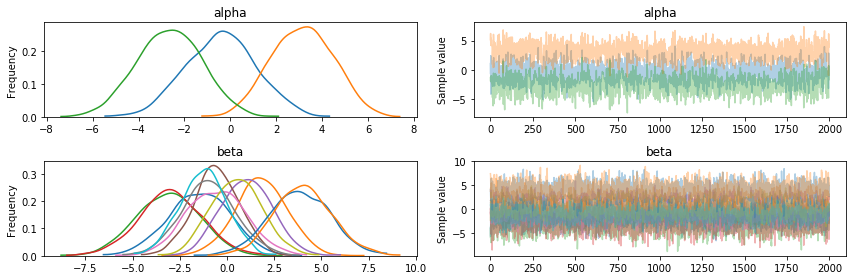

In [3]:
import theano.tensor as tt

with pm.Model() as model_s:
    alpha = pm.Normal('alpha', mu=0, sd=2, shape=3)
    beta = pm.Normal('beta', mu=0, sd=2, shape=(4, 3))
    mu = alpha + pm.math.dot(x_s, beta)
    theta = tt.nnet.softmax(mu)
    
    yl = pm.Categorical('yl', p=theta, observed=y_s)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_s = pm.sample(2000, step, start, chains=1)
pm.traceplot(trace_s)
plt.show()

In [4]:
data_pred = trace_s['alpha'].mean(axis=0) + np.dot(x_s, trace_s['beta'].mean(axis=0))
y_pred = []
for point in data_pred:
    y_pred.append(np.exp(point)/np.sum(np.exp(point), axis=0))
np.sum(y_s == np.argmax(y_pred, axis=1)) / len(y_s)

0.9733333333333334

C:\ProgramData\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')


  0%|          | 0/5000 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


logp = -180.91, ||grad|| = 95.316:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -42.319, ||grad|| = 0.57601:   0%|          | 10/5000 [00:00<00:04, 1112.13it/s]

logp = -42.148, ||grad|| = 0.047894:   0%|          | 20/5000 [00:00<00:03, 1334.68it/s]

logp = -42.148, ||grad|| = 0.00098897:   1%|          | 30/5000 [00:00<00:03, 1365.05it/s]

logp = -42.148, ||grad|| = 0.00098897: 100%|██████████| 37/37 [00:00<00:00, 1371.77it/s]  

Sequential sampling (1 chains in 1 job)

NUTS: [beta, alpha]

  0%|          | 0/2500 [00:00<?, ?it/s]

  1%|          | 14/2500 [00:00<00:19, 127.40it/s]

  1%|          | 27/2500 [00:00<00:19, 127.08it/s]

  2%|▏         | 41/2500 [00:00<00:19, 128.58it/s]

  2%|▏         | 52/2500 [00:00<00:20, 120.02it/s]

  3%|▎         | 69/2500 [00:00<00:18, 129.85it/s]

  3%|▎         | 86/2500 [00:00<00:17, 135.77it/s]

  4%|▍         | 102/2500 [00:00<00:17, 140.03it/s]

  5%|▍         | 119/2500 [00:00<00:16, 146.37it/s]

  5%|▌         | 134/2500 [00:00<00:16, 146.62it/s]

  6%|▌         | 149/2500 [00:01<00:16, 143.84it/s]

  7%|▋         | 166/2500 [00:01<00:15, 148.86it/s]

  7%|▋         | 186/2500 [00:01<00:14, 160.50it/s]

  8%|▊         | 203/2500 [00:01<00:15, 149.91it/s]

  9%|▉         | 221/2500 [00:01<00:14, 157.04it/s]

 10%|▉         | 238/2500 [00:01<00:14, 160.31it/s]

 10%|█         | 260/2500 [00:01<00:12, 172.91it/s]

 11%|█         | 278/2500 [00:01<00:12, 171.53it/s]

 12%|█▏        | 296/2500 [00:01<00:12, 170.58it/s]

 13%|█▎        | 314/2500 [00:02<00:13, 167.55it/s]

 13%|█▎        | 336/2500 [00:02<00:12, 177.45it/s]

 14%|█▍        | 355/2500 [00:02<00:12, 177.54it/s]

 15%|█▌        | 375/2500 [00:02<00:11, 182.77it/s]

 16%|█▌        | 394/2500 [00:02<00:12, 170.97it/s]

 16%|█▋        | 412/2500 [00:02<00:12, 169.71it/s]

 17%|█▋        | 430/2500 [00:02<00:12, 169.79it/s]

 18%|█▊        | 449/2500 [00:02<00:11, 174.95it/s]

 19%|█▊        | 467/2500 [00:02<00:11, 171.94it/s]

 19%|█▉        | 485/2500 [00:03<00:11, 168.00it/s]

 20%|██        | 506/2500 [00:03<00:11, 177.86it/s]

 21%|██        | 525/2500 [00:03<00:11, 172.98it/s]

 22%|██▏       | 544/2500 [00:03<00:11, 175.83it/s]

 23%|██▎       | 563/2500 [00:03<00:10, 179.40it/s]

 23%|██▎       | 582/2500 [00:03<00:10, 179.92it/s]

 24%|██▍       | 602/2500 [00:03<00:10, 182.51it/s]

 25%|██▍       | 621/2500 [00:03<00:10, 176.52it/s]

 26%|██▌       | 640/2500 [00:03<00:10, 179.39it/s]

 26%|██▋       | 659/2500 [00:03<00:10, 179.91it/s]

 27%|██▋       | 680/2500 [00:04<00:09, 185.06it/s]

 28%|██▊       | 699/2500 [00:04<00:10, 179.70it/s]

 29%|██▊       | 718/2500 [00:04<00:10, 176.62it/s]

 30%|██▉       | 738/2500 [00:04<00:09, 181.59it/s]

 30%|███       | 759/2500 [00:04<00:09, 186.31it/s]

 31%|███       | 780/2500 [00:04<00:08, 192.36it/s]

 32%|███▏      | 800/2500 [00:04<00:09, 188.06it/s]

 33%|███▎      | 820/2500 [00:04<00:09, 185.69it/s]

 34%|███▎      | 839/2500 [00:04<00:08, 185.38it/s]

 34%|███▍      | 858/2500 [00:05<00:09, 179.90it/s]

 35%|███▌      | 877/2500 [00:05<00:09, 180.27it/s]

 36%|███▌      | 897/2500 [00:05<00:08, 183.78it/s]

 37%|███▋      | 917/2500 [00:05<00:08, 186.83it/s]

 37%|███▋      | 936/2500 [00:05<00:08, 184.55it/s]

 38%|███▊      | 955/2500 [00:05<00:08, 184.04it/s]

 39%|███▉      | 975/2500 [00:05<00:08, 187.03it/s]

 40%|███▉      | 996/2500 [00:05<00:07, 190.28it/s]

 41%|████      | 1016/2500 [00:05<00:08, 182.58it/s]

 42%|████▏     | 1038/2500 [00:05<00:07, 191.95it/s]

 42%|████▏     | 1058/2500 [00:06<00:07, 187.79it/s]

 43%|████▎     | 1077/2500 [00:06<00:07, 185.74it/s]

 44%|████▍     | 1096/2500 [00:06<00:07, 184.34it/s]

 45%|████▍     | 1115/2500 [00:06<00:07, 183.37it/s]

 45%|████▌     | 1134/2500 [00:06<00:07, 182.17it/s]

 46%|████▌     | 1153/2500 [00:06<00:07, 178.28it/s]

 47%|████▋     | 1175/2500 [00:06<00:07, 186.20it/s]

 48%|████▊     | 1196/2500 [00:06<00:06, 192.28it/s]

 49%|████▊     | 1216/2500 [00:06<00:06, 191.25it/s]

 49%|████▉     | 1236/2500 [00:07<00:06, 181.22it/s]

 50%|█████     | 1256/2500 [00:07<00:06, 184.46it/s]

 51%|█████     | 1275/2500 [00:07<00:06, 181.87it/s]

 52%|█████▏    | 1294/2500 [00:07<00:06, 179.59it/s]

 53%|█████▎    | 1313/2500 [00:07<00:06, 177.53it/s]

 53%|█████▎    | 1334/2500 [00:07<00:06, 183.78it/s]

 54%|█████▍    | 1353/2500 [00:07<00:06, 176.36it/s]

 55%|█████▍    | 1371/2500 [00:07<00:06, 172.89it/s]

 56%|█████▌    | 1389/2500 [00:07<00:06, 172.01it/s]

 56%|█████▋    | 1409/2500 [00:08<00:06, 178.16it/s]

 57%|█████▋    | 1430/2500 [00:08<00:05, 184.73it/s]

 58%|█████▊    | 1451/2500 [00:08<00:05, 189.12it/s]

 59%|█████▉    | 1471/2500 [00:08<00:05, 186.92it/s]

 60%|█████▉    | 1491/2500 [00:08<00:05, 186.98it/s]

 60%|██████    | 1510/2500 [00:08<00:05, 184.65it/s]

 61%|██████    | 1529/2500 [00:08<00:05, 185.19it/s]

 62%|██████▏   | 1549/2500 [00:08<00:05, 187.33it/s]

 63%|██████▎   | 1568/2500 [00:08<00:05, 184.88it/s]

 63%|██████▎   | 1587/2500 [00:08<00:04, 185.36it/s]

 64%|██████▍   | 1606/2500 [00:09<00:04, 185.69it/s]

 65%|██████▌   | 1625/2500 [00:09<00:04, 183.23it/s]

 66%|██████▌   | 1644/2500 [00:09<00:04, 183.13it/s]

 67%|██████▋   | 1663/2500 [00:09<00:04, 179.94it/s]

 67%|██████▋   | 1682/2500 [00:09<00:04, 179.27it/s]

 68%|██████▊   | 1701/2500 [00:09<00:04, 181.37it/s]

 69%|██████▉   | 1720/2500 [00:09<00:04, 178.75it/s]

 70%|██████▉   | 1738/2500 [00:09<00:04, 178.64it/s]

 70%|███████   | 1756/2500 [00:09<00:04, 175.44it/s]

 71%|███████   | 1774/2500 [00:10<00:04, 172.27it/s]

 72%|███████▏  | 1793/2500 [00:10<00:04, 176.30it/s]

 72%|███████▏  | 1812/2500 [00:10<00:03, 177.72it/s]

 73%|███████▎  | 1832/2500 [00:10<00:03, 180.93it/s]

 74%|███████▍  | 1851/2500 [00:10<00:03, 175.48it/s]

 75%|███████▍  | 1870/2500 [00:10<00:03, 176.65it/s]

 76%|███████▌  | 1890/2500 [00:10<00:03, 179.66it/s]

 76%|███████▋  | 1910/2500 [00:10<00:03, 184.85it/s]

 77%|███████▋  | 1932/2500 [00:10<00:02, 192.68it/s]

 78%|███████▊  | 1952/2500 [00:11<00:02, 188.81it/s]

 79%|███████▉  | 1971/2500 [00:11<00:02, 187.55it/s]

 80%|███████▉  | 1991/2500 [00:11<00:02, 188.47it/s]

 80%|████████  | 2010/2500 [00:11<00:02, 186.21it/s]

 81%|████████  | 2031/2500 [00:11<00:02, 191.24it/s]

 82%|████████▏ | 2051/2500 [00:11<00:02, 184.21it/s]

 83%|████████▎ | 2072/2500 [00:11<00:02, 187.72it/s]

 84%|████████▎ | 2091/2500 [00:11<00:02, 181.45it/s]

 84%|████████▍ | 2110/2500 [00:11<00:02, 181.35it/s]

 85%|████████▌ | 2131/2500 [00:11<00:01, 186.13it/s]

 86%|████████▌ | 2150/2500 [00:12<00:01, 182.48it/s]

 87%|████████▋ | 2169/2500 [00:12<00:01, 170.79it/s]

 88%|████████▊ | 2188/2500 [00:12<00:01, 173.29it/s]

 88%|████████▊ | 2208/2500 [00:12<00:01, 179.60it/s]

 89%|████████▉ | 2228/2500 [00:12<00:01, 181.79it/s]

 90%|████████▉ | 2248/2500 [00:12<00:01, 185.39it/s]

 91%|█████████ | 2267/2500 [00:12<00:01, 179.91it/s]

 91%|█████████▏| 2286/2500 [00:12<00:01, 176.76it/s]

 92%|█████████▏| 2308/2500 [00:12<00:01, 185.04it/s]

 93%|█████████▎| 2328/2500 [00:13<00:00, 187.22it/s]

 94%|█████████▍| 2347/2500 [00:13<00:00, 181.64it/s]

 95%|█████████▍| 2366/2500 [00:13<00:00, 183.06it/s]

 95%|█████████▌| 2386/2500 [00:13<00:00, 184.76it/s]

 96%|█████████▌| 2406/2500 [00:13<00:00, 188.07it/s]

 97%|█████████▋| 2425/2500 [00:13<00:00, 185.94it/s]

 98%|█████████▊| 2445/2500 [00:13<00:00, 186.81it/s]

 99%|█████████▊| 2464/2500 [00:13<00:00, 183.46it/s]

 99%|█████████▉| 2484/2500 [00:13<00:00, 187.13it/s]

100%|██████████| 2500/2500 [00:13<00:00, 178.89it/s]

Only one chain was sampled, this makes it impossible to run some convergence checks

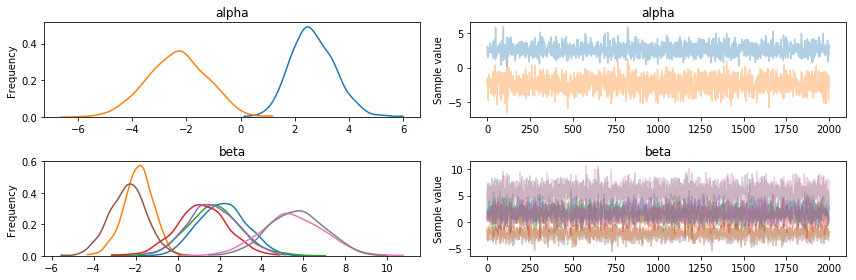

In [5]:
with pm.Model() as model_s:
    alpha = pm.Normal('alpha', mu=0, sd=2, shape=2)
    beta = pm.Normal('beta', mu=0, sd=2, shape=(4, 2))
    alpha_f = tt.concatenate([[0], alpha])
    beta_f = tt.concatenate([np.zeros((4, 1)), beta], axis=1)
    mu = alpha_f + pm.math.dot(x_s, beta_f)
    theta = tt.nnet.softmax(mu)
    
    yl = pm.Categorical('yl', p=theta, observed=y_s)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_s = pm.sample(2000, step, start, chains=1)
pm.traceplot(trace_s)
plt.show()

In [ ]:
with pm.Model() as lda:
    mus = pm.Normal('mus', mu=0, sd=10, shape=2)
    sigmas = pm.Uniform('sigmas', 0, 10)
    
    setosa = pm.Normal('setosa', mu=mus[0], sd=sigmas[0], observed=x_0[:50])
    versicolor = pm.Normal('versicolor', mu=mus[1], sd=sigmas[1], observed=x_0[50:])
    
    bd = pm.Deterministic('bd', (mus[0]+mus[1])/2)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_lda = pm.sample(5000, step, start)

In [ ]:
pm.summary(trace_lda)